In [1]:
#Imports for data handling and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "vscode" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

#Import for models and metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

In [2]:
#The dataset is imbalanced which explain the choice of f1 score in the template
df = pd.read_csv("conversion_data_train.csv")
df_s = df.sample(10000)
df_s["converted"].value_counts()

0    9687
1     313
Name: converted, dtype: int64

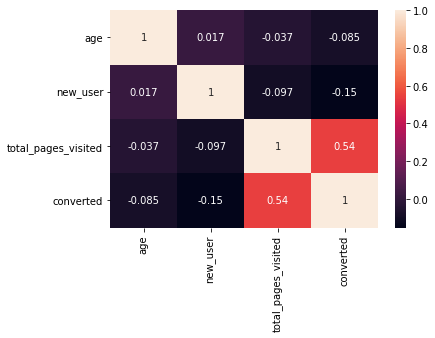

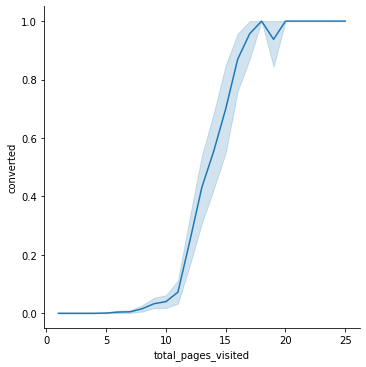

In [3]:
#We will visualize if there are correlations between the converted variable and the others

corr = df_s.corr()
sns.heatmap(corr,annot=True)

#Pages visited seems to be the only significant variable on the converted rate
#We will check the relation between the two 

sns.relplot(x=df_s["total_pages_visited"],y=df_s["converted"],kind="line")

In [4]:
#This will contain all the information provided by the template

features_list = ["total_pages_visited"]
numeric_indices = [0]
categorical_indices = []
target_variable = "converted"

X = df_s.loc[:, features_list]
Y = df_s.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')

Dividing into train and test sets...
...Done.

Convert pandas DataFrames to numpy arrays...
...Done
[[9]
 [2]
 [1]
 [1]
 [3]]
[[7]
 [4]]

[0 0 0 0 0]
[0 0]
Encoding categorical features and standardizing numerical features...
...Done
[[ 1.21948301]
 [-0.86861608]
 [-1.16691595]
 [-1.16691595]
 [-0.57031621]]
Train model...
...Done.
Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.62288327]
 [-0.27201634]
 [ 0.02628353]
 [ 0.02628353]
 [ 0.3245834 ]]
Predictions on test set...
...Done.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0

In [5]:
#Here we will take the same steps and try to improve the model
#First we will stratify the train/test split

features_list = ["total_pages_visited"]
numeric_indices = [0]
categorical_indices = []
target_variable = "converted"

X = df_s.loc[:, features_list]
Y = df_s.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0,stratify=Y)
print("...Done.")
print()

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')

Dividing into train and test sets...
...Done.

Convert pandas DataFrames to numpy arrays...
...Done
[[5]
 [2]
 [2]
 [5]
 [4]]
[[ 8]
 [12]]

[0 0 0 0 0]
[0 1]
Encoding categorical features and standardizing numerical features...
...Done
[[ 0.03170741]
 [-0.86567214]
 [-0.86567214]
 [ 0.03170741]
 [-0.26741911]]
Train model...
...Done.
Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.92908696]
 [ 2.12559302]
 [ 1.52733999]
 [-0.86567214]
 [ 1.22821347]]
Predictions on test set...
...Done.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [6]:
#Stratifying didn't yield a major improvement but we will keep it since the dataset is imbalanced
#We will add the remaining numerical features into the model since they had a small but non negligeable contribution according to the heatmap

features_list = ["total_pages_visited","age","new_user"]
numeric_indices = [0,1,2]
categorical_indices = []
target_variable = "converted"

X = df_s.loc[:, features_list]
Y = df_s.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0,stratify=Y)
print("...Done.")
print()

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Explanatory variables :  Index(['total_pages_visited', 'age', 'new_user'], dtype='object')

Dividing into train and test sets...
...Done.

Convert pandas DataFrames to numpy arrays...
...Done
[[ 5 32  1]
 [ 2 19  0]
 [ 2 43  1]
 [ 5 43  0]
 [ 4 23  1]]
[[ 8 40  1]
 [12 20  1]]

[0 0 0 0 0]
[0 1]
Encoding categorical features and standardizing numerical features...
...Done
[[ 0.03170741  0.17714412  0.68127002]
 [-0.86567214 -1.41007151 -1.46784677]
 [-0.86567214  1.52017272  0.68127002]
 [ 0.03170741  1.52017272 -1.46784677]
 [-0.26741911 -0.92169747  0.68127002]]
Train model...
...Done.
Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.92908696  1.15389219  0.68127002]
 [ 2.12559302 -1.287978    0.68127002]
 [ 1.52733999 -0.55541694 -1.46784677]
 [-0.86567214  0.29923763  0.68127002]
 [ 1.22821347  1.64226623 -1.46784677]]
Predictions on test set...
...Done.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0

In [7]:
#We have gained 6% on the score
#We can also try adding the categorical features

features_list = ["total_pages_visited","age","new_user","source","country"]
numeric_indices = [0,1,2]
categorical_indices = [3,4]
target_variable = "converted"

X = df_s.loc[:, features_list]
Y = df_s.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0,stratify=Y)
print("...Done.")
print()

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_indices),
        ('cat', categorical_transformer, categorical_indices)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !! 
print('...Done.')
print(X_test[0:5,:])
print()

# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Explanatory variables :  Index(['total_pages_visited', 'age', 'new_user', 'source', 'country'], dtype='object')

Dividing into train and test sets...
...Done.

Convert pandas DataFrames to numpy arrays...
...Done
[[5 32 1 'Seo' 'China']
 [2 19 0 'Seo' 'US']
 [2 43 1 'Ads' 'US']
 [5 43 0 'Direct' 'US']
 [4 23 1 'Direct' 'UK']]
[[8 40 1 'Ads' 'US']
 [12 20 1 'Seo' 'US']]

[0 0 0 0 0]
[0 1]
Encoding categorical features and standardizing numerical features...
Performing preprocessings on train set...
[[5 32 1 'Seo' 'China']
 [2 19 0 'Seo' 'US']
 [2 43 1 'Ads' 'US']
 [5 43 0 'Direct' 'US']
 [4 23 1 'Direct' 'UK']]
...Done.
[[ 0.03170741  0.17714412  0.68127002  0.          1.          0.
   0.          0.        ]
 [-0.86567214 -1.41007151 -1.46784677  0.          1.          0.
   0.          1.        ]
 [-0.86567214  1.52017272  0.68127002  0.          0.          0.
   0.          1.        ]
 [ 0.03170741  1.52017272 -1.46784677  1.          0.          0.
   0.          1.        ]
 

In [8]:
#We are now at 77% without overfitting
#Decision Trees and Random Forest can be explored at a later stage, we will keep the logistic regression
#We can now take it to unlabelled data according to the template

# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])



Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[[16]
 [ 5]
 [ 1]
 [ 6]
 [ 3]]


In [9]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")
X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...


ValueError: X has 1 features, but ColumnTransformer is expecting 5 features as input.

In [ ]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_MCheraki-model1.csv', index=False)

In [ ]:
# cross-validation (to check scores variability)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X, Y, scoring = 'f1')

print('mean score : ', scores.mean())
print('std : ', scores.std())

In [ ]:
feat_imp = pd.DataFrame(index = range(X.shape[1]), columns = ['importance'], data = classifier.feature_importances_)
feat_imp